In [1]:
import os,sys
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))  # if notebook is inside "notebooks/"

import seaborn as sns
from src import config

# Set plotting style for better aesthetics
sns.set_theme(style="whitegrid")

In [15]:
try:
    engine = sqlalchemy.create_engine(config.POSTGRES_URI)
    print("Successfully connected to the PostgreSQL database.")
except Exception as e:
    print(f"Failed to connect to the database: {e}")

Successfully connected to the PostgreSQL database.


In [16]:
# A simple query to fetch a sample of the data
query = "SELECT * FROM float_profiles ORDER BY RANDOM() LIMIT 5000;"

# Load data from SQL into a pandas DataFrame
df = pd.read_sql(query, engine)

print("Data loaded successfully. Here's a preview:")
df.head()

Data loaded successfully. Here's a preview:


,id,float_wmo_id,timestamp,latitude,longitude,measurements
0,951530,None,2002-01-14 18:30:00+00:00,26.052835,132.0,"{'PSAL': 34.805, 'depth': 10.0, 'PSAL_ERR': 0...."
1,249938,None,2002-01-14 18:30:00+00:00,-48.427258,-121.5,"{'PSAL': 34.268, 'depth': 10.0, 'PSAL_ERR': 0...."
2,1061484,None,2002-01-14 18:30:00+00:00,23.785791,167.5,"{'PSAL': 35.271, 'depth': 1.0, 'PSAL_ERR': 0.0..."
3,916189,None,2002-01-14 18:30:00+00:00,-61.006260,117.5,"{'PSAL': 33.789, 'depth': 3.0, 'PSAL_ERR': 0.0..."
4,972813,None,2002-01-14 18:30:00+00:00,-54.052509,140.5,"{'PSAL': 33.795, 'depth': 3.0, 'PSAL_ERR': 0.0..."


In [17]:
# Unpack the jsonb 'measurements' column into a new DataFrame
measurements_df = pd.json_normalize(df['measurements'])

# Combine the new measurements columns with the original DataFrame
df = pd.concat([df.drop('measurements', axis=1), measurements_df], axis=1)

print("DataFrame after unpacking the 'measurements' column:")
df.info()
df.head()

DataFrame after unpacking the 'measurements' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            5000 non-null   int64              
 1   float_wmo_id  0 non-null      object             
 2   timestamp     5000 non-null   datetime64[ns, UTC]
 3   latitude      5000 non-null   float64            
 4   longitude     5000 non-null   float64            
 5   PSAL          5000 non-null   float64            
 6   depth         5000 non-null   float64            
 7   PSAL_ERR      5000 non-null   float64            
 8   PSAL_PCTVAR   5000 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(1)
memory usage: 351.7+ KB


,id,float_wmo_id,timestamp,latitude,longitude,PSAL,depth,PSAL_ERR,PSAL_PCTVAR
0,951530,None,2002-01-14 18:30:00+00:00,26.052835,132.0,34.805,10.0,0.052,37.0
1,249938,None,2002-01-14 18:30:00+00:00,-48.427258,-121.5,34.268,10.0,0.028,100.0
2,1061484,None,2002-01-14 18:30:00+00:00,23.785791,167.5,35.271,1.0,0.093,98.0
3,916189,None,2002-01-14 18:30:00+00:00,-61.006260,117.5,33.789,3.0,0.055,100.0
4,972813,None,2002-01-14 18:30:00+00:00,-54.052509,140.5,33.795,3.0,0.041,100.0


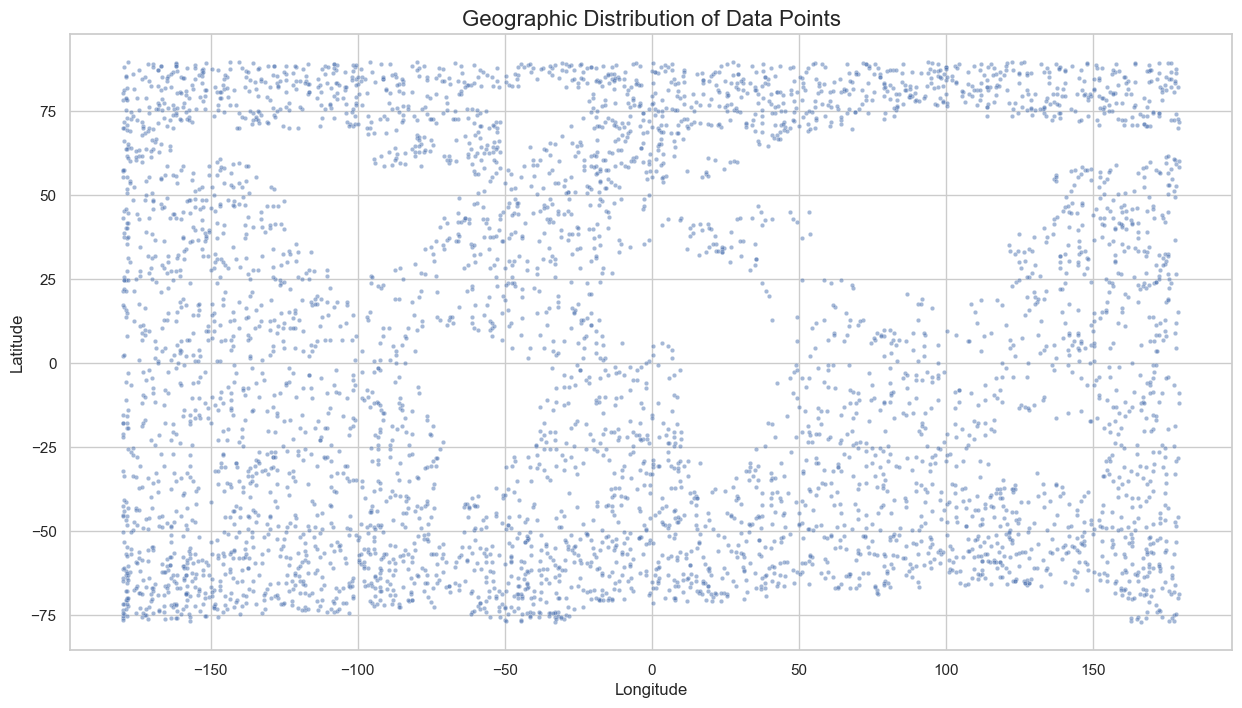

In [18]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, s=10, alpha=0.5)
plt.title('Geographic Distribution of Data Points', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()